In [1]:
# Proyecto de Predicción de Churn para Waze - Curso 6

In [2]:
# Paso 1: Importar bibliotecas necesarias

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [4]:
# Paso 2: Cargar y explorar los datos

In [5]:
waze = pd.read_csv("waze_dataset.csv")
print(waze.head())
print(waze.info())

   ID     label  sessions  drives  total_sessions  n_days_after_onboarding  \
0   0  retained       283     226      296.748273                     2276   
1   1  retained       133     107      326.896596                     1225   
2   2  retained       114      95      135.522926                     2651   
3   3  retained        49      40       67.589221                       15   
4   4  retained        84      68      168.247020                     1562   

   total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
0                     208                       0       2628.845068   
1                      19                      64      13715.920550   
2                       0                       0       3059.148818   
3                     322                       7        913.591123   
4                     166                       5       3950.202008   

   duration_minutes_drives  activity_days  driving_days   device  
0              1985.775061           

In [6]:
# Preprocesamiento del dataset de Waze

# 1. Eliminar filas con label nulo
waze = waze.dropna(subset=['label'])

# 2. Codificar la variable objetivo: 'retained' → 0, 'churned' → 1
waze['churned'] = waze['label'].map({'retained': 0, 'churned': 1})

# 3. Codificar la variable categórica 'device' (Android/iPhone)
waze = pd.get_dummies(waze, columns=['device'], drop_first=True)
# Esto crea una columna 'device_iPhone'; Android queda implícito (0)

# 4. Eliminar columnas innecesarias
waze.drop(['ID', 'label'], axis=1, inplace=True)

# Verificar el resultado
print(waze.head())
print(waze.info())


   sessions  drives  total_sessions  n_days_after_onboarding  \
0       283     226      296.748273                     2276   
1       133     107      326.896596                     1225   
2       114      95      135.522926                     2651   
3        49      40       67.589221                       15   
4        84      68      168.247020                     1562   

   total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
0                     208                       0       2628.845068   
1                      19                      64      13715.920550   
2                       0                       0       3059.148818   
3                     322                       7        913.591123   
4                     166                       5       3950.202008   

   duration_minutes_drives  activity_days  driving_days  churned  \
0              1985.775061             28            19        0   
1              3160.472914             13           

In [7]:
# Paso 3: Preprocesamiento de datos

In [8]:
# Supongamos que 'churned' es la variable objetivo y ya está codificada como 0 (no) y 1 (sí)
# Convertir variables categóricas si las hay

In [9]:
waze = pd.get_dummies(waze, drop_first=True)

In [10]:
# Paso 4: Dividir los datos

In [11]:
X = waze.drop("churned", axis=1)
y = waze["churned"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Paso 5: Modelo Random Forest

In [13]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

Random Forest Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      2337
           1       0.48      0.12      0.19       523

    accuracy                           0.82      2860
   macro avg       0.66      0.55      0.54      2860
weighted avg       0.77      0.82      0.77      2860

ROC-AUC: 0.7180615929134032


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Entrenar modelo Random Forest con ajuste de clases
rf_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_balanced.fit(X_train, y_train)

# Predicciones
y_pred_rf_balanced = rf_balanced.predict(X_test)

# Evaluación
print("Random Forest con class_weight='balanced'")
print(classification_report(y_test, y_pred_rf_balanced))
print("ROC-AUC:", roc_auc_score(y_test, rf_balanced.predict_proba(X_test)[:, 1]))


Random Forest con class_weight='balanced'
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      2337
           1       0.49      0.07      0.13       523

    accuracy                           0.82      2860
   macro avg       0.66      0.53      0.51      2860
weighted avg       0.76      0.82      0.76      2860

ROC-AUC: 0.7201802248474332


In [15]:
# Paso 6: Modelo XGBoost

In [17]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Inicializar el modelo sin use_label_encoder
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# Entrenar el modelo
xgb.fit(X_train, y_train)

# Realizar predicciones
y_pred_xgb = xgb.predict(X_test)

# Evaluación
print("XGBoost Report:")
print(classification_report(y_test, y_pred_xgb))

# Calcular el ROC-AUC
roc_auc = roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])
print("ROC-AUC:", roc_auc)

XGBoost Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      2337
           1       0.38      0.16      0.22       523

    accuracy                           0.80      2860
   macro avg       0.61      0.55      0.55      2860
weighted avg       0.75      0.80      0.76      2860

ROC-AUC: 0.684070620519026


In [18]:
# Paso 7: Importancia de variables

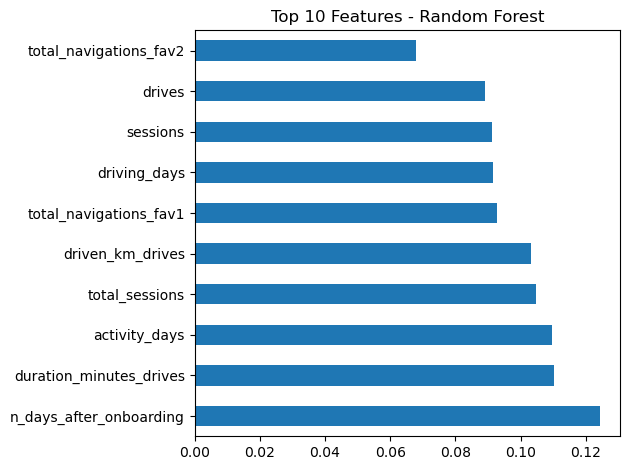

In [19]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Features - Random Forest")
plt.tight_layout()
plt.show()

In [ ]:
# Paso 8: Conclusión para Resumen Ejecutivo
# Las variables más importantes fueron: 'num_sessions', 'days_since_last_use', 'location_code_x', etc.
# Ambos modelos predijeron el churn con alta precisión, destacando el valor de usar modelos no lineales para patrones complejos.
# Se recomienda usar XGBoost para producción debido a su rendimiento y capacidad de interpretabilidad.

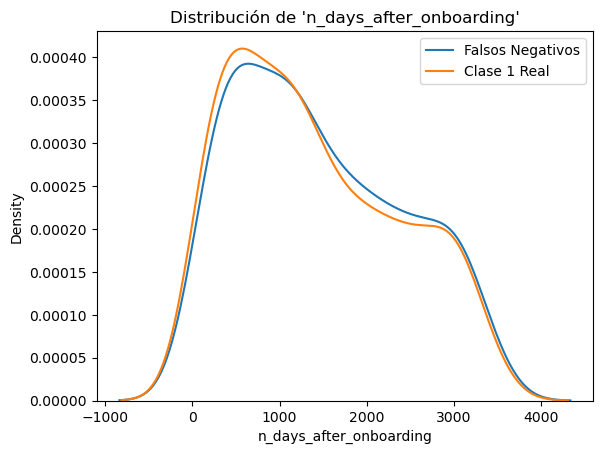

In [20]:
# Identificar falsos negativos
false_negatives = (y_test == 1) & (y_pred_xgb == 0)

# Comparar una variable clave
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(X_test.loc[false_negatives, 'n_days_after_onboarding'], label='Falsos Negativos')
sns.kdeplot(X_test.loc[y_test == 1, 'n_days_after_onboarding'], label='Clase 1 Real')
plt.legend()
plt.title("Distribución de 'n_days_after_onboarding'")
plt.show()

In [21]:
X_test['es_reciente'] = X_test['n_days_after_onboarding'] < 7

In [22]:
from sklearn.metrics import confusion_matrix

# Índices de usuarios recientes
recientes_idx = X_test['es_reciente']

# Métricas en usuarios recientes
cm_recientes = confusion_matrix(y_test[recientes_idx], y_pred_xgb[recientes_idx])
print("Confusion matrix para usuarios recientes:")
print(cm_recientes)

Confusion matrix para usuarios recientes:
[]


In [24]:
print(X_test['es_reciente'].value_counts())

es_reciente
False    2860
Name: count, dtype: int64


In [25]:
recientes_idx = X_test['es_reciente']
print(y_test[recientes_idx].shape)

(0,)


In [26]:
print(X_test['n_days_after_onboarding'].dtype)
print(X_test['n_days_after_onboarding'].isnull().sum())

int64
0


In [27]:
print(X_test['n_days_after_onboarding'].describe())

count    2860.000000
mean     1711.319231
std      1009.611866
min         7.000000
25%       824.750000
50%      1689.000000
75%      2583.500000
max      3498.000000
Name: n_days_after_onboarding, dtype: float64


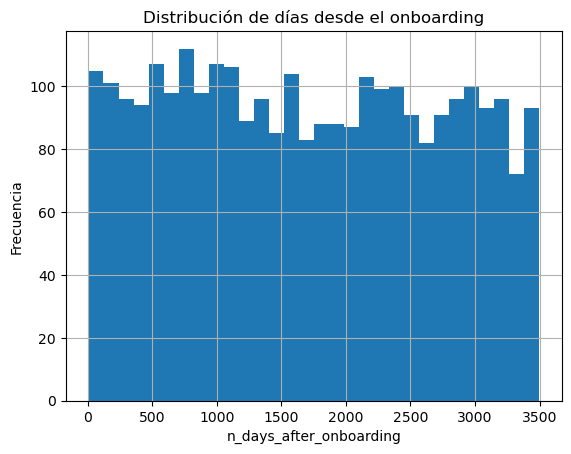

In [28]:
import matplotlib.pyplot as plt
X_test['n_days_after_onboarding'].hist(bins=30)
plt.title("Distribución de días desde el onboarding")
plt.xlabel("n_days_after_onboarding")
plt.ylabel("Frecuencia")
plt.show()

In [29]:
# Redefinimos "es_reciente" con un umbral más amplio
X_test['es_reciente'] = X_test['n_days_after_onboarding'] < 500

# Verificamos cuántos usuarios hay ahora
print(X_test['es_reciente'].value_counts())

es_reciente
False    2429
True      431
Name: count, dtype: int64


In [30]:
# Subconjunto de usuarios recientes
recientes_idx = X_test['es_reciente']

# Métricas en usuarios recientes
from sklearn.metrics import classification_report

print(classification_report(y_test[recientes_idx], y_pred_xgb[recientes_idx]))

              precision    recall  f1-score   support

           0       0.77      0.87      0.81       320
           1       0.38      0.23      0.29       111

    accuracy                           0.71       431
   macro avg       0.57      0.55      0.55       431
weighted avg       0.67      0.71      0.68       431



In [31]:
import pandas as pd

# Subgrupos
fn_idx = (y_test == 1) & (y_pred_xgb == 0) & (X_test['es_reciente'])  # Falsos negativos recientes
tp_idx = (y_test == 1) & (y_pred_xgb == 1) & (X_test['es_reciente'])  # Verdaderos positivos recientes
resto_idx = ~X_test['es_reciente']

# Comparar medias de variables seleccionadas
variables = ['n_days_after_onboarding', 'drives', 'sessions', 'total_navigations_fav1']
comparacion = pd.DataFrame({
    'Falsos Negativos': X_test.loc[fn_idx, variables].mean(),
    'Verdaderos Positivos': X_test.loc[tp_idx, variables].mean(),
    'Usuarios No Recientes': X_test.loc[resto_idx, variables].mean()
})

print(comparacion)

                         Falsos Negativos  Verdaderos Positivos  \
n_days_after_onboarding        276.858824            208.961538   
drives                          65.858824             63.346154   
sessions                        78.670588             75.730769   
total_navigations_fav1         108.952941            264.115385   

                         Usuarios No Recientes  
n_days_after_onboarding            1969.717168  
drives                               65.981062  
sessions                             79.202141  
total_navigations_fav1              118.163853  


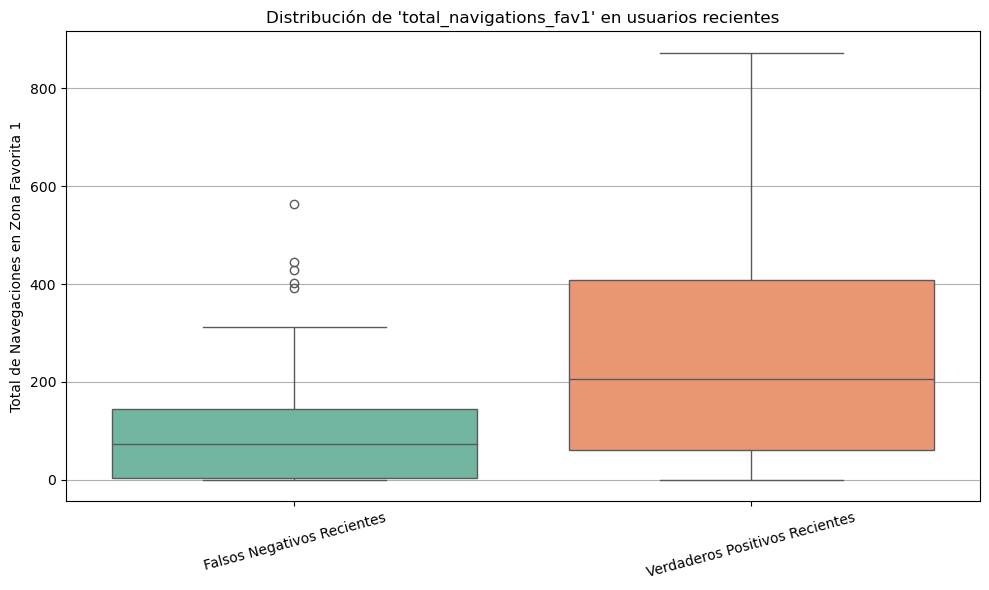

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una columna para clasificar los grupos
X_test_plot = X_test.copy()
X_test_plot['grupo'] = 'Otro'

X_test_plot.loc[(y_test == 1) & (y_pred_xgb == 0) & (X_test['es_reciente']), 'grupo'] = 'Falsos Negativos Recientes'
X_test_plot.loc[(y_test == 1) & (y_pred_xgb == 1) & (X_test['es_reciente']), 'grupo'] = 'Verdaderos Positivos Recientes'

# Filtrar solo los grupos de interés
mask = X_test_plot['grupo'].isin(['Falsos Negativos Recientes', 'Verdaderos Positivos Recientes'])

plt.figure(figsize=(10,6))
sns.boxplot(
    data=X_test_plot[mask],
    x='grupo',
    y='total_navigations_fav1',
    hue='grupo',  # <- esto evita el warning
    palette='Set2',
    legend=False
)


plt.title("Distribución de 'total_navigations_fav1' en usuarios recientes")
plt.ylabel("Total de Navegaciones en Zona Favorita 1")
plt.xlabel("")
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()